# Group Assignment 2 Census Data Exploration 
## Emily DiPressi 

Our project goal is to find correlations between government funding and areas of crime in the United States. For this assignment, I chose to look at racial census data for the United States in 2019. The information from this census data and the maps it produces can help us find disparities in racial projections. Areas with high concentrations of minorities may be the place of less government spending and therefore, more crime. If we know the areas that are disproportionately affected we can target government spending and community services. 


In [5]:
# importing the necessary libraries 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [6]:
# import the datafile 
race = gpd.read_file('acs2019_1yr_B03002_04000US46.geojson')

In [7]:
# Checking the first 5 rows of data. Making sure it was imported properly
race.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,01000US,United States,328239523.0,0.0,267757777.0,11342.0,196789401.0,22517.0,40596040.0,70047.0,...,7113.0,15513283.0,118300.0,3005564.0,54552.0,1353333.0,39431.0,1652231.0,35736.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US01,Alabama,4903185.0,0.0,4683889.0,3767.0,3192955.0,2602.0,1312821.0,7594.0,...,335.0,64828.0,6767.0,9131.0,2376.0,4013.0,1486.0,5118.0,2074.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,731545.0,0.0,678997.0,110.0,437714.0,2139.0,21773.0,1790.0,...,246.0,10506.0,2917.0,6566.0,1793.0,1919.0,679.0,4647.0,1642.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7278717.0,0.0,4968125.0,0.0,3929213.0,3028.0,319045.0,6230.0,...,531.0,354332.0,19597.0,108541.0,9836.0,47258.0,6933.0,61283.0,6386.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,3017804.0,0.0,2785853.0,2662.0,2171931.0,1252.0,464996.0,5949.0,...,232.0,72496.0,8350.0,12499.0,3068.0,6004.0,2375.0,6495.0,2257.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."


In [8]:
# checking the rows and columns 
race.shape

(52, 45)

The 52 row value includes the 50 states, D.C., and the United States total 

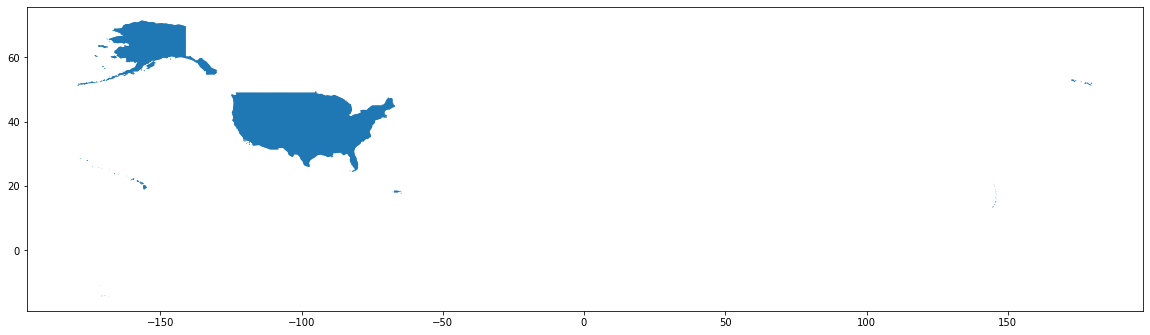

In [9]:
# simple plot of a map of the data 
race.plot(figsize=(20,10))

Not sure what the blue islands on the side are becuse the data is for the US 

In [10]:
# dropping the first row, which is a summary/total. Do not need the U.S. total 
race=race.drop([0])

In [11]:
race.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,04000US01,Alabama,4903185.0,0.0,4683889.0,3767.0,3192955.0,2602.0,1312821.0,7594.0,...,335.0,64828.0,6767.0,9131.0,2376.0,4013.0,1486.0,5118.0,2074.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,731545.0,0.0,678997.0,110.0,437714.0,2139.0,21773.0,1790.0,...,246.0,10506.0,2917.0,6566.0,1793.0,1919.0,679.0,4647.0,1642.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7278717.0,0.0,4968125.0,0.0,3929213.0,3028.0,319045.0,6230.0,...,531.0,354332.0,19597.0,108541.0,9836.0,47258.0,6933.0,61283.0,6386.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,3017804.0,0.0,2785853.0,2662.0,2171931.0,1252.0,464996.0,5949.0,...,232.0,72496.0,8350.0,12499.0,3068.0,6004.0,2375.0,6495.0,2257.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,39512223.0,0.0,23937341.0,0.0,14356081.0,6353.0,2171989.0,16630.0,...,2644.0,5317020.0,68648.0,754032.0,23128.0,369050.0,16432.0,384982.0,16920.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


Dropping the first row of data, deleted the total for the United States and now we are left with data from the 50 states and the District of Coulumbia

In [12]:
# deleting columns I do not need and keeping the ones I do need
columns_to_keep = ['geoid',
                   'name',
                   'B03002001',
                   'B03002002',
                   'B03002003',
                   'B03002004',
                   'B03002005',
                   'B03002006',
                   'B03002007',
                   'B03002008',
                   'B03002009',
                   'B03002012',
                   'geometry']

In [13]:
# redefining race to be only with the columns I want
race = race[columns_to_keep]

In [14]:
race.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,04000US01,Alabama,4903185.0,4683889.0,3192955.0,1312821.0,19364.0,65215.0,1520.0,9623.0,82391.0,219296.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,731545.0,678997.0,437714.0,21773.0,113467.0,43322.0,9715.0,2096.0,50910.0,52548.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7278717.0,4968125.0,3929213.0,319045.0,289161.0,235202.0,13361.0,10110.0,172033.0,2310592.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,3017804.0,2785853.0,2171931.0,464996.0,16216.0,45839.0,12673.0,3094.0,71104.0,231951.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,39512223.0,23937341.0,14356081.0,2171989.0,149063.0,5786711.0,141846.0,107538.0,1224113.0,15574882.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


In [15]:
# renaming columns 
list(race)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [16]:
# renaming columns 
race.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black or African American',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Some other race',
 'Two or more races',
 'Hispanic or Latino',
 'geometry']

In [17]:
# checking to make sure the output worked 
race.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black or African American,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Some other race,Two or more races,Hispanic or Latino,geometry
1,04000US01,Alabama,4903185.0,4683889.0,3192955.0,1312821.0,19364.0,65215.0,1520.0,9623.0,82391.0,219296.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,731545.0,678997.0,437714.0,21773.0,113467.0,43322.0,9715.0,2096.0,50910.0,52548.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7278717.0,4968125.0,3929213.0,319045.0,289161.0,235202.0,13361.0,10110.0,172033.0,2310592.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,3017804.0,2785853.0,2171931.0,464996.0,16216.0,45839.0,12673.0,3094.0,71104.0,231951.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,39512223.0,23937341.0,14356081.0,2171989.0,149063.0,5786711.0,141846.0,107538.0,1224113.0,15574882.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


In [18]:
# First 5 values of Total 
race['Total'].head()

1     4903185.0
2      731545.0
3     7278717.0
4     3017804.0
5    39512223.0
Name: Total, dtype: float64

In [21]:
# information on the Total 
race['Total'].describe()

count    5.100000e+01
mean     6.436069e+06
std      7.360660e+06
min      5.787590e+05
25%      1.789606e+06
50%      4.467673e+06
75%      7.446805e+06
max      3.951222e+07
Name: Total, dtype: float64

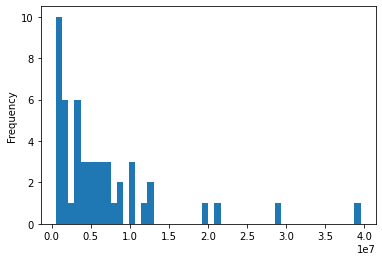

In [22]:
# histogram of the Total values 
race['Total'].plot.hist(bins=50)

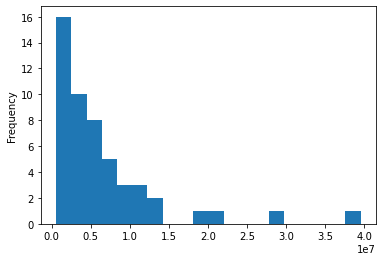

In [23]:
# changed bin number to see how it differed 
race['Total'].plot.hist(bins=20)

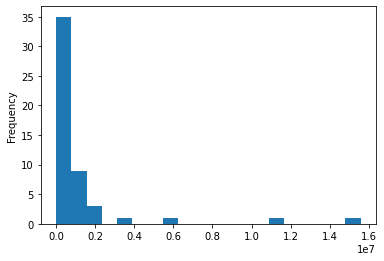

In [25]:
# Histogram of Hispanic or Latino group
race['Hispanic or Latino'].plot.hist(bins=20)

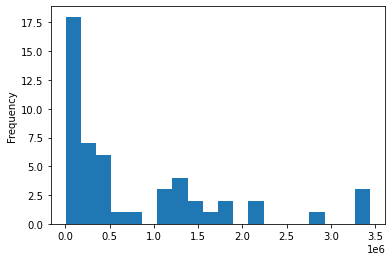

In [27]:
# Histogram of Non Hispanic Black or African American
race['Non Hispanic Black or African American'].plot.hist(bins=20)

In [56]:
# replacing values with percentages 
race['Percent Non Hispanic White'] = race['Non Hispanic White']/race['Total']*100
race['Percent Non Hispanic Black or African American'] = race['Non Hispanic Black or African American']/race['Total']*100
race['Percent Non Hispanic American Indian and Alaska Native'] = race['Non Hispanic American Indian and Alaska Native']/race['Total']*100
race['Percent Non Hispanic Asian'] = race['Non Hispanic Asian']/race['Total']*100
race['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = race['Non Hispanic Native Hawaiian and Other Pacific Islander']/race['Total']*100
race['Percent Some other race'] = race['Some other race']/race['Total']*100
race['Percent Two or more races'] = race['Two or more races']/race['Total']*100
race['Percent Hispanic or Latino'] = race['Hispanic or Latino']/race['Total']*100

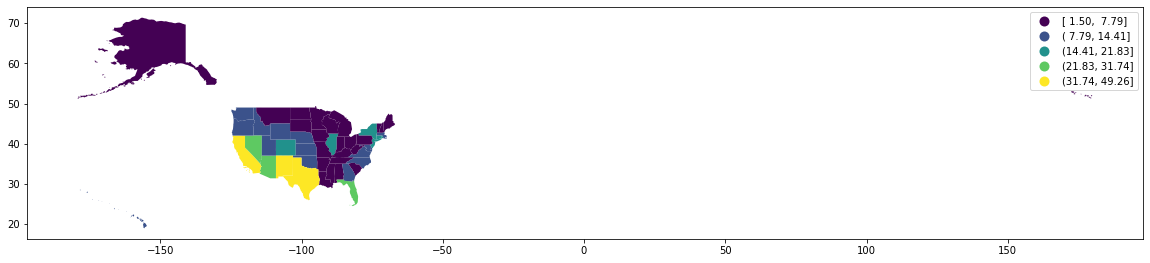

In [57]:
# map plot of the US with values color coded for the percent of Hispanic or Latino populations 
race.plot(figsize=(20,20),
                 column='Percent Hispanic or Latino',
                 legend=True, 
                 scheme='NaturalBreaks')

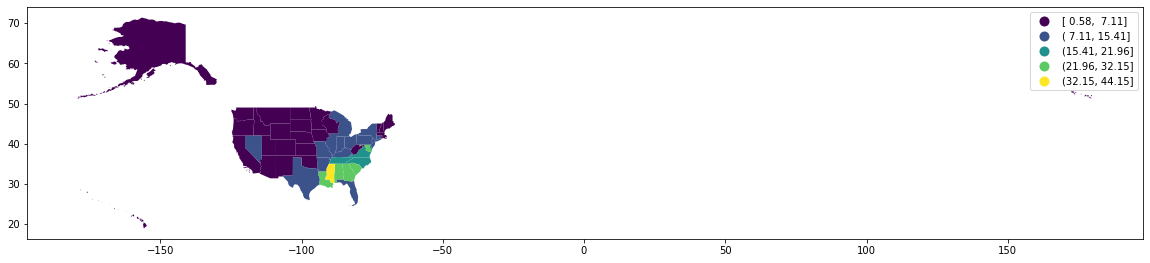

In [59]:
# map plot of the US with values color coded for the Percent Non Hispanic Black or African American populations 
race.plot(figsize=(20,20),
                 column='Percent Non Hispanic Black or African American',
                 legend=True, 
                 scheme='NaturalBreaks')

In [60]:
# adding a base layer 
race_web_mercator = race.to_crs(epsg=3857)

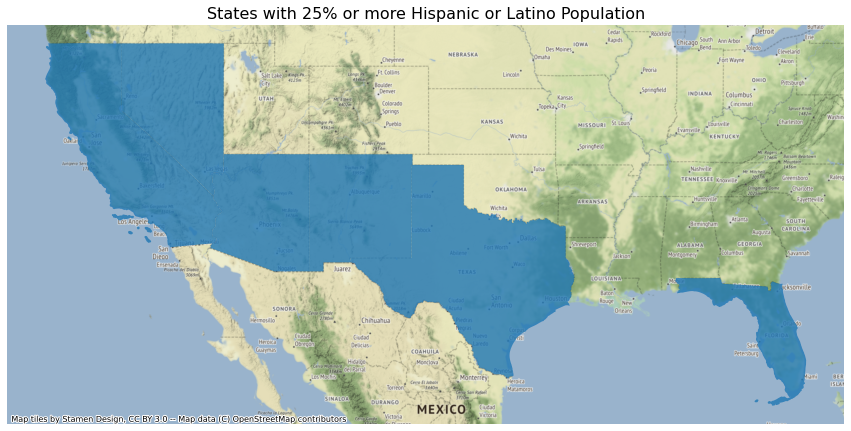

In [61]:
# Using subplots
fig, ax = plt.subplots(figsize=(15, 15))

# Add the layer with ax=ax in the argument 
race_web_mercator[race_web_mercator['Percent Hispanic or Latino'] > 25].plot(ax=ax, alpha=0.8)

# Turn the axis off
ax.axis('off')

# Set a title
ax.set_title('States with 25% or more Hispanic or Latino Population',fontsize=16)

# Add a basemap
ctx.add_basemap(ax)

My first attempt was to do greater than 50% Hispanic or Latino population and it was unable to becuase that plot is empty. There is no state in the United States that has a population of greater than 50% Hispanic

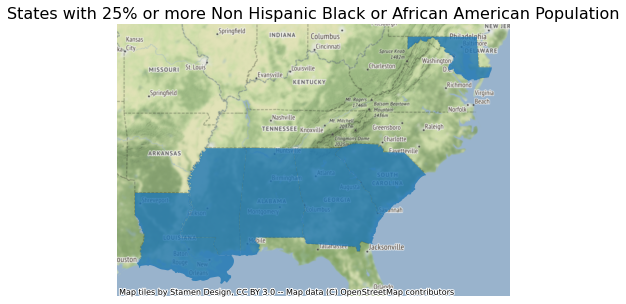

In [72]:
# Using subplots
fig, ax = plt.subplots(figsize=(20, 5))

# Add the layer with ax=ax in the argument 
race_web_mercator[race_web_mercator['Percent Non Hispanic Black or African American'] > 25].plot(ax=ax, alpha=0.8)

# Turn the axis off
ax.axis('off')

# Set a title
ax.set_title('States with 25% or more Non Hispanic Black or African American Population',fontsize=16)

# Add a basemap
ctx.add_basemap(ax)

States with greater than 25% Black non Hispanic population are mostly located in the southern United States and in Maryland. 